# Jonathan Halverson
# Saturday, January 28, 2017
# Les Miserable network analysis (Coappearance of characters)

It was necessary to downgrade to NetworkX 1.9 from 1.11 to get this to work. This was done by first removing the new version (sudo conda remove networkx) and then installing the old (sudo conda install networkx=1.9)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
G = nx.read_gml('lesmiserables.gml', relabel=True)

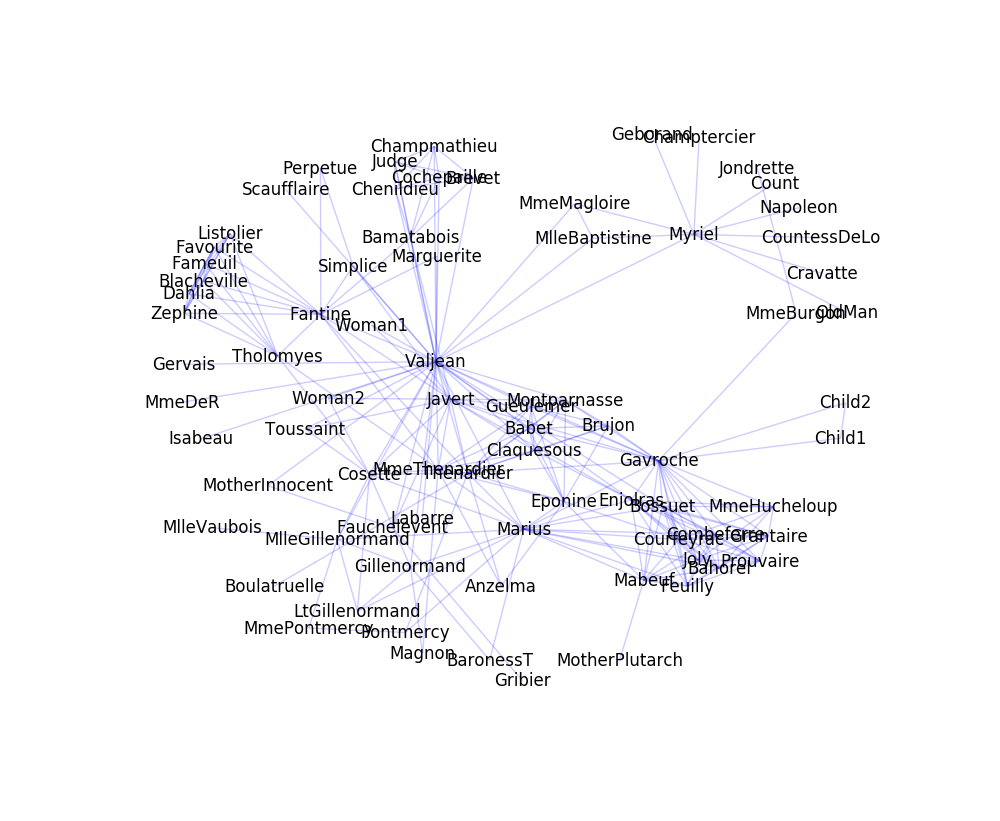

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
nx.draw(G, node_size=0, edge_color='b', alpha=0.2, font_size=12, with_labels=True)

In [15]:
deg = nx.degree(G)
from numpy import percentile, mean, median
print min(deg.values())
print percentile(deg.values(),25) # computes the 1st quartile print median(deg.values())
print percentile(deg.values(),75) # computes the 3rd quartile print max(deg.values())

1
2.0
10.0


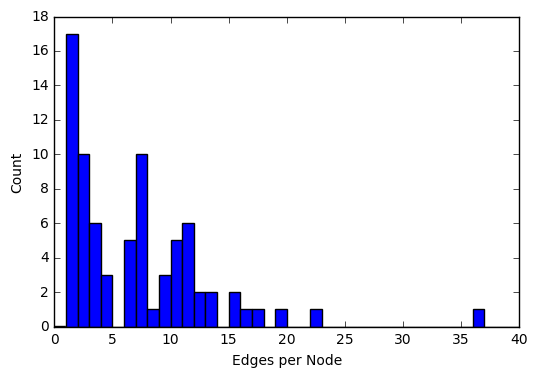

In [21]:
plt.hist(deg.values(), bins=40, range=(0,40))
plt.xlabel('Edges per Node')
plt.ylabel('Count')

In [26]:
sorted(deg.items(), key=lambda u: u[1], reverse=True)[:10]

[(u'Valjean', 36),
 (u'Gavroche', 22),
 (u'Marius', 19),
 (u'Javert', 17),
 (u'Thenardier', 16),
 (u'Fantine', 15),
 (u'Enjolras', 15),
 (u'Courfeyrac', 13),
 (u'Bossuet', 13),
 (u'Bahorel', 12)]

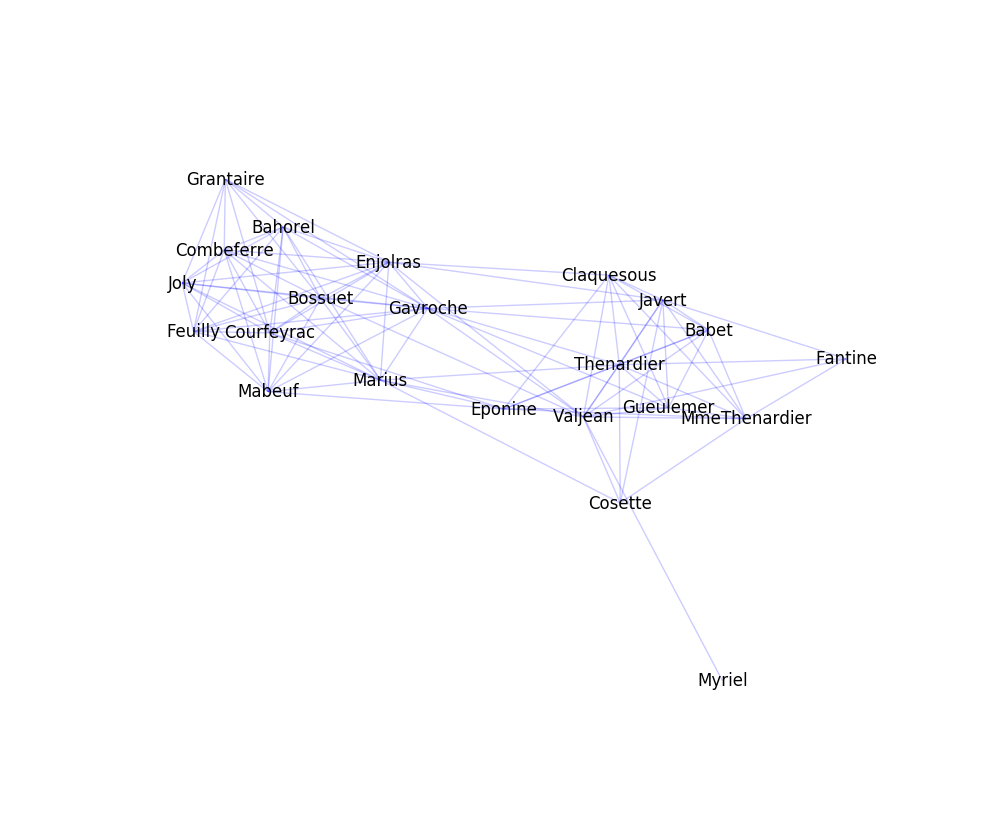

In [28]:
G_sub = G.copy()
deg_sub = nx.degree(G_sub)
for n in G_sub.nodes():
    if deg_sub[n] < 10:
        G_sub.remove_node(n)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
nx.draw(G_sub, node_size=0, edge_color='b', alpha=0.2, font_size=12, with_labels=True)

In [33]:
from networkx import find_cliques
cliques = list(find_cliques(G))

In [34]:
print max(cliques, key=lambda l: len(l))

[u'Joly', u'Gavroche', u'Bahorel', u'Enjolras', u'Courfeyrac', u'Bossuet', u'Combeferre', u'Feuilly', u'Prouvaire', u'Grantaire']
